File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0000.txt                  2022-11-24 11:23:12     91741530
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0001.txt                  2022-11-24 11:23:18     92793422
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0002.txt                  2022-11-24 11:23:26     95576204
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0003.txt                  2022-11-24 11:23:34     96033702
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0004.txt                  2022-11-24 11:23:40     95900857
File: 0
File: 1


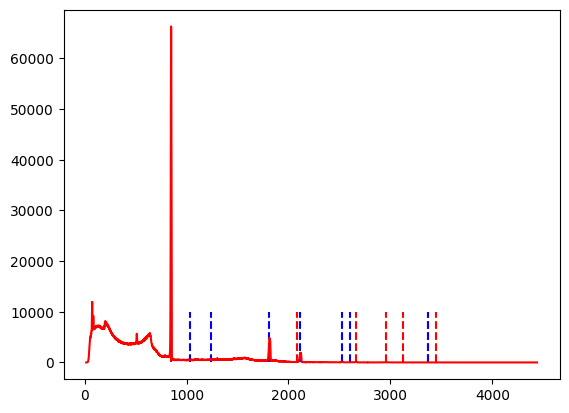

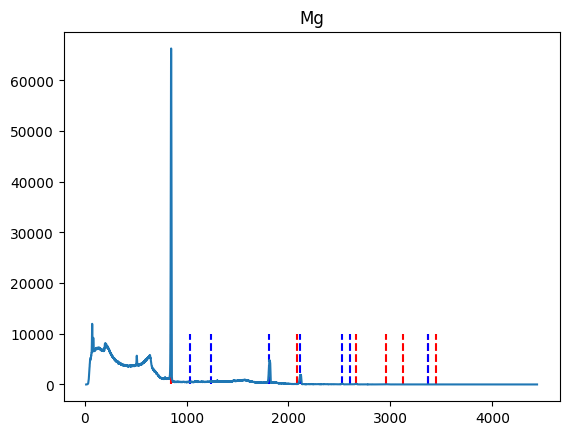

In [11]:
import numpy as np
import pandas as pd
import glob
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from zipfile import ZipFile


  
#specifying the zip file name
for i in range(5):
    file_name = f'Dag 2/Mg_data/Mg_1_maalning_dag2_ch000{i}.zip'
    
    # opening the zip file in READ mode
    with ZipFile(file_name, 'r') as zip:
        # printing all the contents of the zip file
        zip.printdir()
    
        # extracting all the files
        zip.extractall()

a = 0.73971712
ae = 9.9e-7
b = 0.3785
be = 1.4e-3

# data = []
# 
#     data.append(np.loadtxt(f'Mg_1_maalning_dag2_ch000{i}.txt')[1])

def getCounts(j, lc: int = 20, hc: int = 6000):
    
    counts = []
    for i in range(j):
        print('File:', str(i))
        data = np.loadtxt(f"Mg_1_maalning_dag2_ch000{i}.txt")
        counts.append(data[:, 1])
    
    (x, y) = np.unique(np.concatenate(counts), return_counts=True)
    lI = np.where(x >= lc)[0][0]
    hI = np.where(x >= hc)[0][0]
    x = x[lI:hI]
    y = y[lI:hI]
    
    a = 0.73971712
    ae = 9.9e-7
    b = 0.3785
    be = 1.4e-3
    x  = x * a + b
    
    return (x, y)

Line = [3445.279,3369.91,3122.908,2959.935,2657.547,2085.064,846.77]
line = [2598.438, 3369.81,2523.06,1037.833,2113.092,1810.726, 1238.27]


plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')



Mg1 = getCounts(5)
# Mg2 = getCounts(1)
# Mg3 = getCounts(2)
# Mg4 = getCounts(3)
# Mg5 = getCounts(4)


# ener = np.concatenate([Mg1[0], Mg2[0] , Mg3[0] , Mg4[0] , Mg5[0]])
# Coun = np.concatenate([Mg1[1], Mg2[1] , Mg3[1] , Mg4[1] , Mg5[1]])

plt.plot(Mg1[0], Mg1[1], color="r", label="data")
plt.show()

plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')

plt.plot(Mg1[0], Mg1[1])
plt.title('Mg')

plt.show()




def gaussFit(x, mu, sig, a, b, c):
    lny = np.log(a) - ((x-mu)**2)/(2*sig**2)
    return np.exp(lny) - (b*x+c)



In [12]:

def getChannel(name: str, data:tuple , lower_limit: int, upper_limit: int, x_1:int, x_2:int, guess: [int, int, int], guess2 = [0,0]):
    x = data[0][lower_limit:upper_limit]
    y = data[1][lower_limit:upper_limit]
    print('x_min',x[0],'x_max',x[-1], 'y_min',y[0],'y_max', y[-1])
    plt.plot(x, y, color="r", label="data")
    yler = np.sqrt(y)
    pinit = guess + guess2
    xhelp = np.linspace(x_1, x_2, 500)
    print('heplmin',xhelp[0],'helpmax',xhelp[-1])
    popt, pcov = curve_fit(gaussFit, x, y, p0=pinit, sigma=yler, absolute_sigma=True)
    print(name)
    print('mu :', popt[0])
    print('sigma :', popt[1])
    print('scaling', popt[2])
    print('background', popt[3], popt[4])
    perr = np.sqrt(np.diag(pcov))
    print('usikkerheder:', perr)
    chmin = np.sum(((y - gaussFit(x, *popt)) / yler) ** 2)
    print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 4))

    
    plt.plot(xhelp, gaussFit(xhelp, *popt), 'k-.', label="gaussfit")
    plt.legend()

    plt.title(name)
    plt.show()


    return [popt, perr]


In [13]:
def t(x):
    return int(x/ a - b)

print(Mg1[1][t(2000):t(2100) ])



[ 116  123  126  136  140  112  117  118  126  123  130  117  129  109
  114  111  102  115  101  107  107  100   90   92   99   77  101   79
  102   81   91   88  114  104   96  104   94  105   98   93   87   98
   93   92   90   92   94   91   73   91   92   89   79   99   99   99
   97  119   94  108   86   93   84   85   82   99  101  101  116   98
  106   93   82   83   95   90   92  111   83  105   90   83   96   85
   92   81   97   96   92  111   91   76  100  109   97   76   82   91
   90   93   96   90   94   91   89  102  123  117  129  133  150  143
  194  190  207  233  252  301  360  401  416  522  624  602  786  861
  914 1140 1166 1357 1511 1577 1724 1698 1741]


x_min 1716.5222184000002 x_max 1937.69763728 y_min 341 y_max 225
heplmin 1750.0 helpmax 1900.0
Mg E=1810.72
mu : 1813.8336633680287
sigma : 6.004397163587885
scaling 4902.619397925426
background 0.48569981223722225 -1207.3078639904752
usikkerheder: [2.24749092e-02 1.78421819e-02 2.02955836e+01 1.56474290e-02
 2.87720456e+01]
chi2: 5097.669766842286  ---> p: 1.0


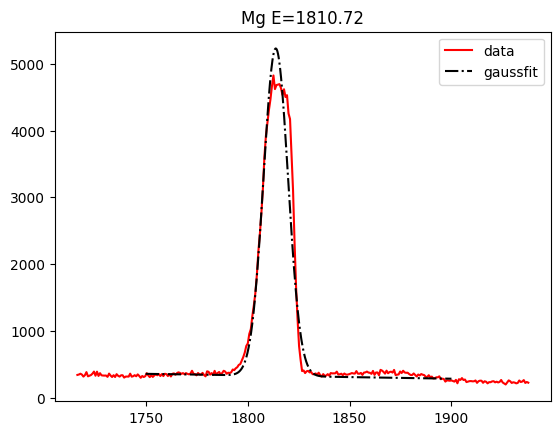

x_min 2826.0978984 x_max 3047.27331728 y_min 19 y_max 14
heplmin 2900.0 helpmax 3000.0
Mg E=2959.03
mu : 2965.6541658513893
sigma : 8.695215375197126
scaling 39.25834867717496
background 0.020775663468379044 -71.6375882873442
usikkerheder: [3.69412802e-01 3.35490854e-01 1.71395538e+00 3.08892918e-03
 9.07553647e+00]
chi2: 417.45873392501596  ---> p: 1.0


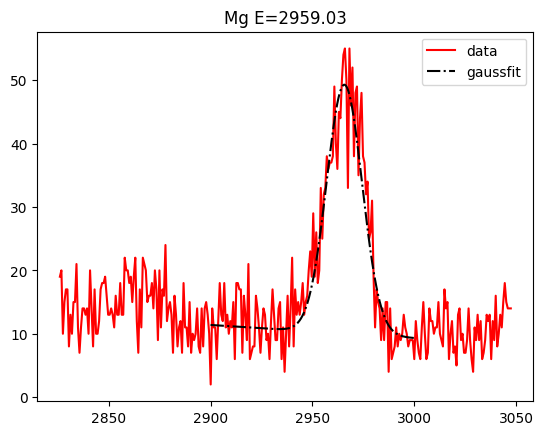

x_min 3048.0130344 x_max 3173.0252276799997 y_min 17 y_max 11
heplmin 3000.0 helpmax 3200.0
Mg E=3122.908
mu : 470.0
sigma : 10.0
scaling 200.0
background 0.01079843574876214 -42.634801695743086
usikkerheder: [inf inf inf inf inf]
chi2: 192.16967734892472  ---> p: 1.0


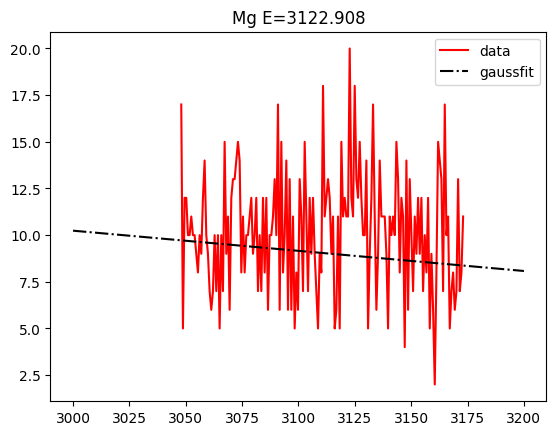

x_min 2027.2034088 x_max 2248.3788276799996 y_min 115 y_max 67
heplmin 2000.0 helpmax 2200.0
Ra E=2113.09
mu : 2116.248150220597
sigma : 6.596282599620813
scaling 1992.5075525178268
background 0.16505320483668132 -429.8278565625244
usikkerheder: [3.58111880e-02 2.69955909e-02 1.19690724e+01 8.27767637e-03
 1.78243339e+01]
chi2: 3149.1657463758916  ---> p: 1.0


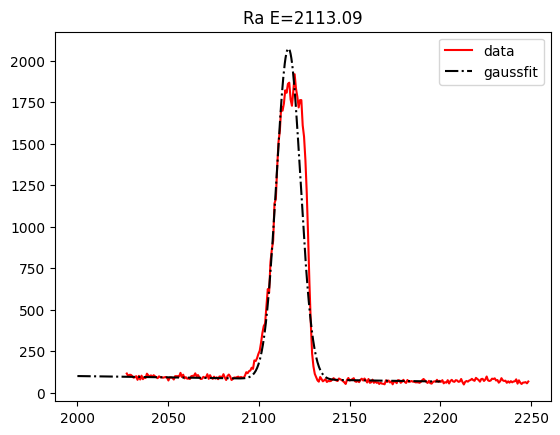

x_min 1006.3937832 x_max 1079.6257780800001 y_min 508 y_max 523
heplmin 1000.0 helpmax 1050.0
Ra E=1037.833
mu : 1088.0945977126078
sigma : -6.858345359158781
scaling 46.68914914199377
background 0.13976241402759795 -636.4914191003306
usikkerheder: [1.28220401e+02 3.91373018e+01 7.07761026e+02 1.45459844e-01
 1.50663473e+02]
chi2: 104.40670016838756  ---> p: 1.0


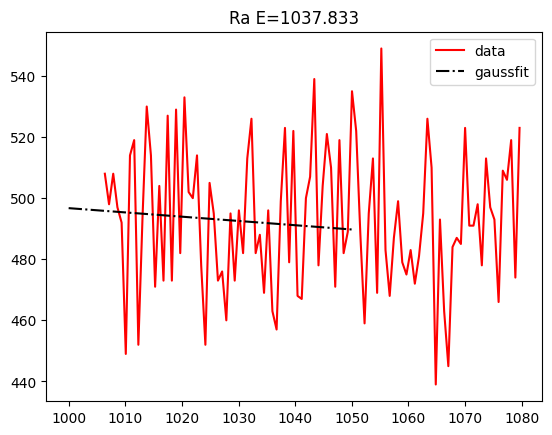

x_min 3048.0130344 x_max 4010.38500752 y_min 17 y_max 3
heplmin 3200.0 helpmax 3500.0
Ra E=3369.9
mu : 3375.1615195194627
sigma : 9.117103413972265
scaling 12.510960796606925
background 0.0038199027722336395 -19.604469220450785
usikkerheder: [8.10248769e-01 7.38491768e-01 1.05861917e+00 2.55652147e-04
 9.19195154e-01]
chi2: 1602.5055876603076  ---> p: 1.0


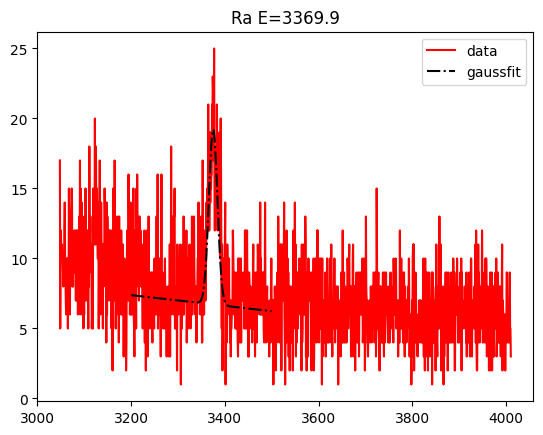

x_min 2382.2676263999997 x_max 2677.41475728 y_min 58 y_max 32
heplmin 2400.0 helpmax 2600.0
Ra E=2523.06
mu : 2526.672800781262
sigma : 7.023468227670731
scaling 97.03180607380811
background 0.061342015725342605 -192.1295652278681
usikkerheder: [2.33734820e-01 2.10903041e-01 3.15317650e+00 3.96332781e-03
 1.00779530e+01]
chi2: 2771.0458871245633  ---> p: 1.0


C:\Users\David\AppData\Local\Temp\ipykernel_7536\3145419713.py:89: RuntimeWarning: invalid value encountered in log
  lny = np.log(a) - ((x-mu)**2)/(2*sig**2)


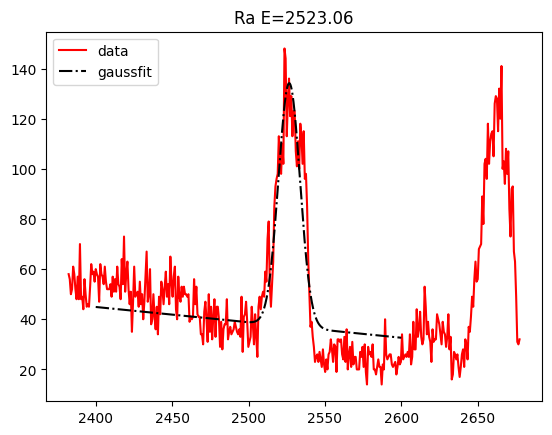

x_min 2567.1969064 x_max 2603.4430452799998 y_min 21 y_max 25
heplmin 2570.0 helpmax 2600.0
Ra E=2598.43
mu : 2588.2739568503885
sigma : 16.375078442889663
scaling 0.0005475820148434115
background -0.004257168540338018 -11.807922148851517
usikkerheder: [3.87466611e+05 9.18931745e+05 4.92936479e+01 6.07577366e-01
 1.53290833e+03]
chi2: 42.27304289903786  ---> p: 0.9999999853568421


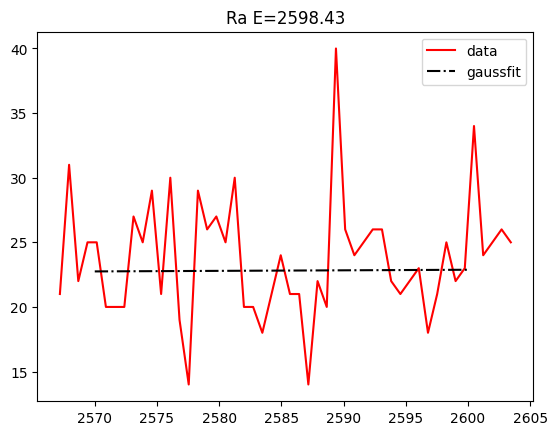

In [14]:
chs = []
chs += [getChannel("Mg E=846.77", Mg1,  800, 1200,700,1000, [850, 10, 200])]
chs += [getChannel("Mg E=2085.0", Mg1, 2700, 2840,2000,2100, [2085, 10, 200])]
chs += [getChannel("Mg E=1238.27", Mg1, 1500, 1800,1100,1300, [1230, 10, 200])]
chs += [getChannel("Mg E=2657.54", Mg1, 3000, 4000, 2500,2800, [2650, 10, 200])]
chs += [getChannel("Mg E=1810.72", Mg1, 2300, 2600, 1750,1900,[1800, 10, 500])]
chs += [getChannel("Mg E=2959.03", Mg1, 3800, 4100, 2900,3000, [2950, 10, 200])] 
chs += [getChannel("Mg E=3122.908", Mg1, 4100, 4270, 3000, 3200, [470, 10, 200])]
chs += [getChannel("Ra E=2113.09", Mg1, 2720, 3020, 2000,2200, [2120, 10, 200])]
chs += [getChannel("Ra E=1037.833", Mg1, 1340, 1440,1000,1050, [1040, 10, 200])]
chs += [getChannel("Ra E=3369.9", Mg1, 4100, 5400,3200, 3500, [3360, 10, 200])]
chs += [getChannel("Ra E=2523.06", Mg1, 3200, 3600,2400,2600, [2500, 10, 200])]
chs += [getChannel("Ra E=2598.43", Mg1, 3450, 3500,2570,2600, [2590, 10, 200])]